# **LINEAR REGRESSION USING KERAS**

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import time

In [0]:
batch_size = 50
num_classes = 10
epochs = 10
learning_rate = 0.01

*SET TENSORBOARD* <br>
Timestamp is used to create uniqueness

In [0]:
model_name = "AlexNet-E{}-LR{}-BS{}-{}".format(epochs, learning_rate, batch_size, int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(model_name))

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #NORMALIZING
x_test /= 255

50000 train samples
10000 test samples


# Architecture

```
padding="same"
```
*in order to adjust architecture to CIFAR-10 dataset*

**AlexNet: [paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)**


In [5]:
model = Sequential()
#-----------LAYER-1--------------
model.add( Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding="same", input_shape=x_train.shape[1:], activation="relu") )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=(2,2), strides=(3,3), padding="same") )
#-----------LAYER-2--------------
model.add( Conv2D(filters=256, kernel_size=(5,5), activation="relu", padding="same") )
model.add( BatchNormalization() )
model.add( MaxPooling2D(pool_size=(2,2), strides=(3,3), padding="same") )
#-----------LAYER-3--------------
model.add( Conv2D(filters=384, kernel_size=(3,3), activation="relu", padding="same") )
#-----------LAYER-4--------------
model.add( Conv2D(filters=384, kernel_size=(3,3), activation="relu", padding="same") )
#-----------LAYER-5--------------
model.add( Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same") )
model.add( MaxPooling2D(pool_size=(2,2), strides=(3,3), padding="same") )
#-----------LAYER-6--------------
model.add( Flatten() )
model.add( Dense(units=4096, activation="relu") )
#-----------LAYER-7--------------
model.add( Dense(units=4096, activation="relu") )
#-----------LAYER-8--------------OUTPUT
model.add( Dense(units=10, activation="softmax") )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
opt = tf.keras.optimizers.Adam(lr=learning_rate)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [7]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.33, verbose=1, callbacks=[tensorboard])

Train on 33500 samples, validate on 16500 samples
Epoch 1/10
33500/33500 [==============================] - 33s 975us/sample - loss: 2.3882 - acc: 0.2042 - val_loss: 1.9944 - val_acc: 0.2480
Epoch 2/10
33500/33500 [==============================] - 31s 916us/sample - loss: 1.8289 - acc: 0.2903 - val_loss: 1.8223 - val_acc: 0.3090
Epoch 3/10
33500/33500 [==============================] - 31s 917us/sample - loss: 1.7057 - acc: 0.3498 - val_loss: 1.7261 - val_acc: 0.3623
Epoch 4/10
33500/33500 [==============================] - 31s 915us/sample - loss: 1.6377 - acc: 0.3925 - val_loss: 1.6530 - val_acc: 0.4016
Epoch 5/10
33500/33500 [==============================] - 31s 917us/sample - loss: 1.5572 - acc: 0.4300 - val_loss: 1.6752 - val_acc: 0.4156
Epoch 6/10
33500/33500 [==============================] - 31s 914us/sample - loss: 1.4973 - acc: 0.4548 - val_loss: 1.5865 - val_acc: 0.4442
Epoch 7/10
33500/33500 [==============================] - 31s 911us/sample - loss: 1.4578 - acc: 0.4734 

# Plotting 

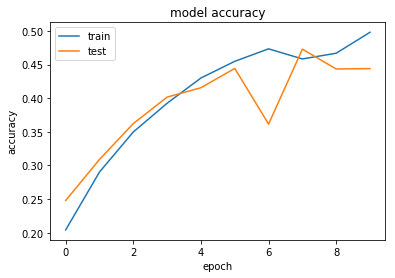

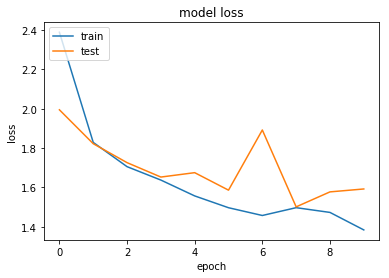

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#------------------------------------------------
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#!tensorboard --logdir logs

TensorBoard 1.15.0 at http://5506cfb83739:6006/ (Press CTRL+C to quit)
^C


# Evaluation

In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 44.82%


# Save and Load

In [14]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

from tensorflow.keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Loaded model from disk


In [15]:
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 44.82%


In [16]:
#save and load architecture and weights together
model.save("full_model.h5")
from tensorflow.keras.models import load_model
full_model = load_model('full_model.h5')
full_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 384)         8

In [17]:
# evaluate loaded model on test data
full_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = full_model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (full_model.metrics_names[1], score[1]*100))

acc: 44.82%
